***1️⃣ Import All Libraries***

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

***2️⃣ Load Dataset***

In [3]:
df = pd.read_csv("credit_card_fraud_10k.csv")
df.head(5)

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [4]:
print(df.shape)

(10000, 10)


***3️⃣ Data Preprocessing***

In [5]:
# Check missing values
print(df.isnull().sum())

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64


In [6]:

# Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB
None


In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [10]:
df = df.drop("transaction_id", axis=1)

In [13]:
le = LabelEncoder()
df["merchant_category"] = le.fit_transform(df["merchant_category"])

In [14]:
print(df["is_fraud"].value_counts())

is_fraud
0    9849
1     151
Name: count, dtype: int64


***4️⃣ EDA & Visualization***

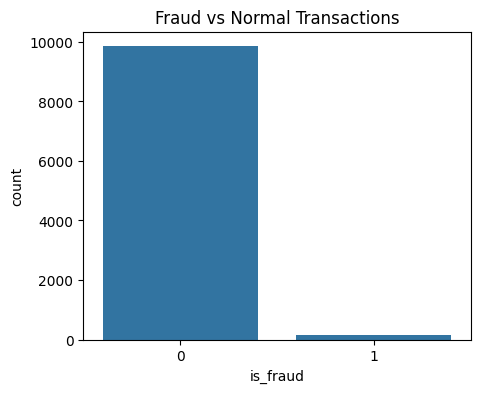

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()

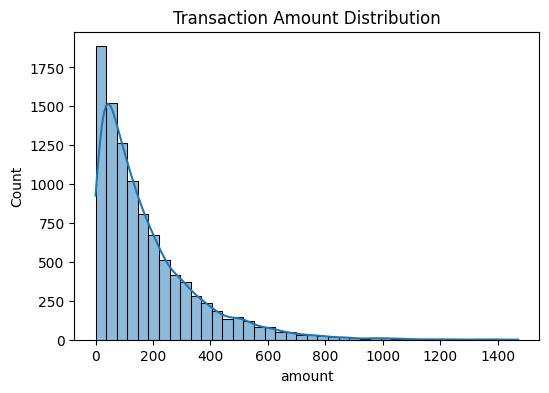

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["amount"], bins=40, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

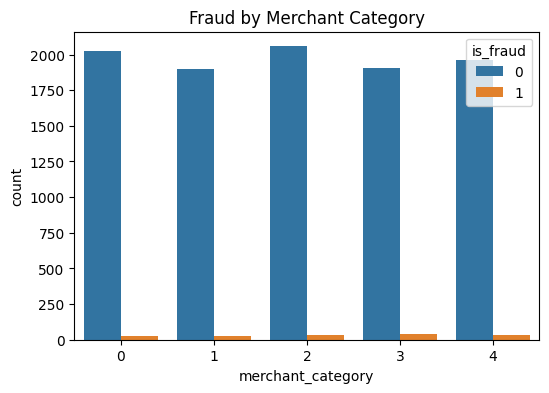

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="merchant_category", hue="is_fraud", data=df)
plt.title("Fraud by Merchant Category")
plt.show()

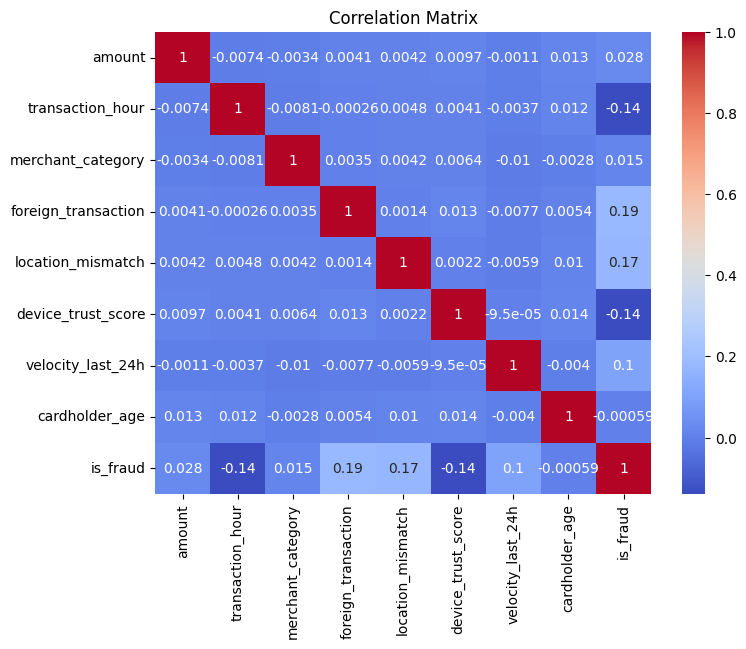

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

***5️⃣ Train-Test Split***

In [19]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

***6️⃣ Feature Scaling***

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***7️⃣ Model Training (Gradient Boosting)***

In [21]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

start = time.time()
gb_model.fit(X_train, y_train)
end = time.time()

print("Training Time:", round(end - start, 2), "seconds")

Training Time: 0.73 seconds


***8️⃣ Model Evaluation***

In [22]:
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
[[1970    0]
 [   2   28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      0.93      0.97        30

    accuracy                           1.00      2000
   macro avg       1.00      0.97      0.98      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC Score: 0.9999492385786803


**📊 ROC Curve**

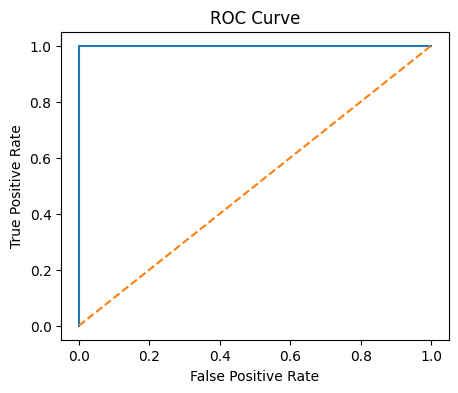

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

***9️⃣ Save Model for Deployment***

In [24]:
joblib.dump(gb_model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

print("Model Saved Successfully!")

Model Saved Successfully!
